In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [78]:
df = pd.read_csv('../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [79]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [80]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [81]:
print(len(train_set))

8012


In [82]:
print(len(test_set))

2003


In [83]:
df.label.unique()

array([3, 4, 1, 6, 0, 2, 5])

In [84]:
classes={0:('kératose actinique et carcinome intraépithélial(Cancereuses)'),
         1:('carcinome basocellulaire (cancereuses)'),
         2:('lésions bénignes de type kératose (non cancéreuses)'),
         3:('dermatofibrome (non cancéreuses)'),
         4:('naevus mélanocytaires (non cancéreuses)'),
         5:('granulomes pyogéniques et hémorragies (Peut conduire au cancer)'),
         6:('mélanome ( cancéreuses)')}

In [85]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

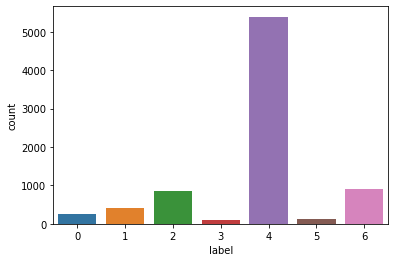

In [86]:
import seaborn as sns
sns.countplot(train_set['label'])

In [87]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

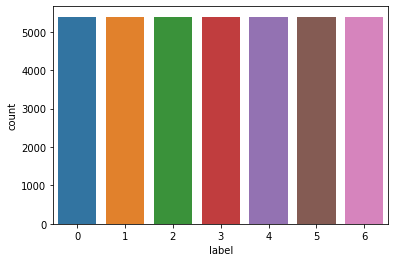

In [88]:
sns.countplot(y_train)


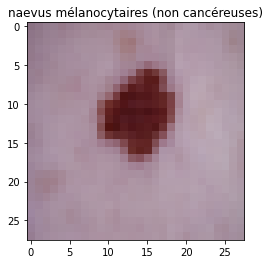

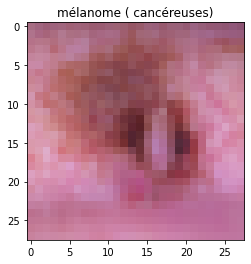

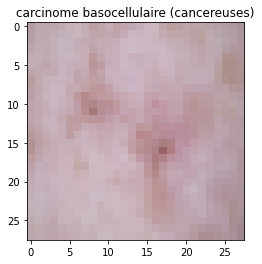

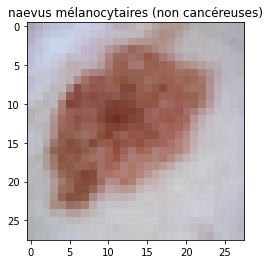

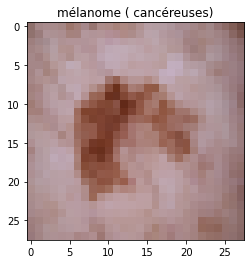

In [100]:

x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(5):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()

In [98]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 5, 5, 64)         

In [91]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=30,
                    shuffle=True,
                    )

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
236/236 [==============================] - 18s 68ms/step - loss: 1.1590 - accuracy: 0.5850 - val_loss: 3.0873 - val_accuracy: 0.0824
Epoch 2/30
236/236 [==============================] - 14s 61ms/step - loss: 0.3875 - accuracy: 0.8754 - val_loss: 1.5734 - val_accuracy: 0.3948
Epoch 3/30
236/236 [==============================] - 15s 65ms/step - loss: 0.2486 - accuracy: 0.9172 - val_loss: 1.2642 - val_accuracy: 0.4213
Epoch 4/30
236/236 [==============================] - 14s 61ms/step - loss: 0.2136 - accuracy: 0.9281 - val_loss: 1.2373 - val_accuracy: 0.5315
Epoch 5/30
236/236 [==============================] - 15s 65ms/step - loss: 0.1475 - accuracy: 0.9492 - val_loss: 0.9700 - val_accuracy: 0.6050
Epoch 6/30
236/236 [==============================] - 15s 64ms/step - loss: 0.1432 - accuracy: 0.9518 - val_loss: 1.5825 - val_accuracy: 0.4838
Epoch 7/30
236/236 [==============================] - 16s 66ms/step - loss: 0.1200 - accuracy: 0.9595 - val_loss: 0.8048 - val_accuracy:

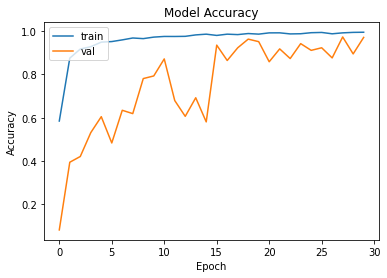

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

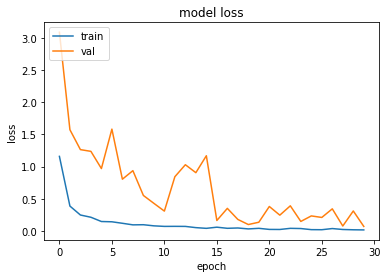

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
model.save('model6.hdf5')